# PyTorch scratchpad - back to basics

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
tensor_example = torch.tensor(np.array([[1,2,3],[4,5,6]]))

In [3]:
print(f"Shape of tensor: {tensor_example.shape}")
print(f"Data type of tensor: {tensor_example.dtype}")
print(tensor_example)

Shape of tensor: torch.Size([2, 3])
Data type of tensor: torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


In [4]:
import torch

# Creating two tensors
tensor_a = torch.tensor([[1, 2], [3, 4]], dtype=torch.int32)
tensor_b = torch.tensor([[5, 6], [7, 8]], dtype=torch.int32)

# Tensor addition
tensor_sum = torch.add(tensor_a, tensor_b)
print(f"Tensor Addition:\n{tensor_sum}")

Tensor Addition:
tensor([[ 6,  8],
        [10, 12]], dtype=torch.int32)


In [5]:
# Element-wise Multiplication
tensor_product = torch.mul(tensor_a, tensor_b)
print(f"Element-wise Multiplication:\n{tensor_product}")

# Matrix Multiplication
tensor_c = torch.tensor([[1], [2]], dtype=torch.int32) # 2x1 tensor
tensor_matmul = torch.matmul(tensor_a, tensor_c)
print(f"Matrix Multiplication:\n{tensor_matmul}")

Element-wise Multiplication:
tensor([[ 5, 12],
        [21, 32]], dtype=torch.int32)
Matrix Multiplication:
tensor([[ 5],
        [11]], dtype=torch.int32)


In [6]:
tensor_add_scaler = tensor_a + 5

In [7]:
print(tensor_a.shape)
print(tensor_c.shape)
print((tensor_a + tensor_c).shape)

torch.Size([2, 2])
torch.Size([2, 1])
torch.Size([2, 2])


In [8]:
print(tensor_a.shape)
print(tensor_c.shape)
print((tensor_a * tensor_c).shape)

torch.Size([2, 2])
torch.Size([2, 1])
torch.Size([2, 2])


In [9]:
tensor_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [10]:
tensor_a.view(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [11]:
tensor_a.view(-1)

tensor([1, 2, 3, 4, 5, 6])

## Dataset basics

In [12]:
# Define a simple array as input data
X = np.array([[1.0, 2.0], [2.0, 1.0], [3.0, 4.0], [4.0, 3.0]])
# Define the target outputs for our dataset
y = np.array([0, 1, 0, 1])

In [13]:
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

In [14]:
from torch.utils.data import TensorDataset

dataset = TensorDataset(X_tensor, y_tensor)

In [15]:
# Print x and y of the TensorDataset
for i in range(len(dataset)):
    X_sample, y_sample = dataset[i]
    print(f"X[{i}]: {X_sample}, y[{i}]: {y_sample}")

X[0]: tensor([1., 2.], dtype=torch.float64), y[0]: 0
X[1]: tensor([2., 1.], dtype=torch.float64), y[1]: 1
X[2]: tensor([3., 4.], dtype=torch.float64), y[2]: 0
X[3]: tensor([4., 3.], dtype=torch.float64), y[3]: 1


In [16]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [17]:
for batch_X, batch_y in dataloader:
    print(f"Batch X:\n{batch_X}")
    print(f"Batch y:\n{batch_y}\n")

Batch X:
tensor([[1., 2.],
        [2., 1.]], dtype=torch.float64)
Batch y:
tensor([0, 1])

Batch X:
tensor([[4., 3.],
        [3., 4.]], dtype=torch.float64)
Batch y:
tensor([1, 0])



## NN in torch

In [18]:
import torch.nn as nn

input_tensor = torch.tensor([[1.0, 2.0]], dtype=torch.float32)
input_tensor.shape

layer = nn.Linear(in_features=2, out_features=3)
output_tensor = layer(input_tensor)
relu = nn.ReLU()
output = relu(output_tensor)

output

tensor([[1.0013, 0.0000, 0.5583]], grad_fn=<ReluBackward0>)

In [19]:
sigmoid = nn.Sigmoid()
output = sigmoid(output_tensor)
output

tensor([[0.7313, 0.1179, 0.6361]], grad_fn=<SigmoidBackward0>)

In [20]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features=10, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

In [21]:
model_simple_nn = SimpleNN()
print(model_simple_nn)

SimpleNN(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [22]:
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)


In [23]:
# Input features [Average Goals Scored, Average Goals Conceded by Opponent]
X = torch.tensor([
    [3.0, 0.5], [1.0, 1.0], [0.5, 2.0], [2.0, 1.5],
    [3.5, 3.0], [2.0, 2.5], [1.5, 1.0], [0.5, 0.5],
    [2.5, 0.8], [2.1, 2.0], [1.2, 0.5], [0.7, 1.5]
], dtype=torch.float32)

# Target outputs [1 if the team is likely to win, 0 otherwise]
y = torch.tensor([[1], [0], [0], [1], [1], [0], [1], [0], [1], [0], [1], [0]], dtype=torch.float32)

print(X.shape)
print(y.shape)

torch.Size([12, 2])
torch.Size([12, 1])


In [24]:
# Training basic model
import torch.optim as optim
from tqdm import tqdm

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in tqdm(range(500)):
    model.train()
    optimizer.zero_grad()

    output = model(X)
    loss = criterion(output, y)

    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:  # Print every 10 epochs
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")  # Print epoch loss


100%|█████████████████████████████████████| 500/500 [00:00<00:00, 4222.22it/s]

Epoch 100, Loss: 0.15303732454776764
Epoch 200, Loss: 0.04358067736029625
Epoch 300, Loss: 0.01743556186556816
Epoch 400, Loss: 0.009052389301359653
Epoch 500, Loss: 0.005511618684977293


In [25]:
model.eval()

new_input = torch.tensor([[4.0, 5.0]], dtype=torch.float32)

with torch.no_grad():
    prediction = model(new_input)

print("Prediction:", (prediction > 0.5).int().item())

Prediction: 0


In [26]:
# Test Features
X_test = torch.tensor([[2.5, 1.0], [0.8, 0.8], [1.0, 2.0], [3.0, 2.5]], dtype=torch.float32)
# Test Targets
y_test = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

In [27]:
from sklearn.metrics import accuracy_score

model.eval()

with torch.no_grad():
    output = model(X_test)
    predictions = (output > 0.5).int()
    test_loss = criterion(output, y_test).item()
    accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
print(f'accuracy -> {accuracy}, test loss -> {test_loss}')

accuracy -> 1.0, test loss -> 0.0028517888858914375


## More modeling

In [28]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [29]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Display the shapes of the resulting splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (124, 13)
Shape of X_test: (54, 13)
Shape of y_train: (124,)
Shape of y_test: (54,)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [32]:
model = nn.Sequential(
    nn.Linear(13, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)
model

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)

In [33]:
import torch.optim as optim
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs, num_epochs = 150, 150
history = {'loss': [], 'val_loss': []}
for epoch in tqdm(range(epochs)):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)

    loss.backward()
    optimizer.step()

    history['loss'].append(loss.item())
    with torch.no_grad():
        outputs_val = model(X_test_tensor)
        val_loss = criterion(outputs_val, y_test_tensor)  
        history['val_loss'].append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')


100%|█████████████████████████████████████| 150/150 [00:00<00:00, 2224.69it/s]

Epoch [10/150], Loss: 1.0581, Validation Loss: 1.0660
Epoch [20/150], Loss: 1.0283, Validation Loss: 1.0395
Epoch [30/150], Loss: 0.9949, Validation Loss: 1.0095
Epoch [40/150], Loss: 0.9553, Validation Loss: 0.9739
Epoch [50/150], Loss: 0.9077, Validation Loss: 0.9315
Epoch [60/150], Loss: 0.8502, Validation Loss: 0.8798
Epoch [70/150], Loss: 0.7837, Validation Loss: 0.8196
Epoch [80/150], Loss: 0.7110, Validation Loss: 0.7529
Epoch [90/150], Loss: 0.6367, Validation Loss: 0.6838
Epoch [100/150], Loss: 0.5647, Validation Loss: 0.6150
Epoch [110/150], Loss: 0.4979, Validation Loss: 0.5493
Epoch [120/150], Loss: 0.4383, Validation Loss: 0.4898
Epoch [130/150], Loss: 0.3867, Validation Loss: 0.4377
Epoch [140/150], Loss: 0.3419, Validation Loss: 0.3922
Epoch [150/150], Loss: 0.3028, Validation Loss: 0.3519


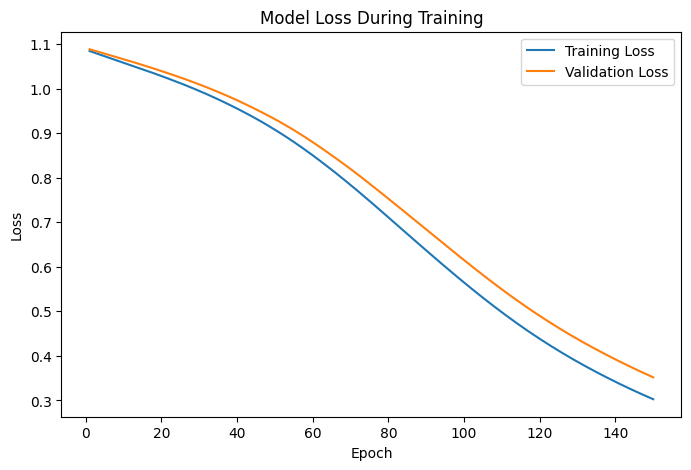

In [34]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [35]:
# Save the entire model
torch.save(model, 'wine_model.pth')

In [36]:
# Load the entire model
loaded_model = torch.load('wine_model.pth')
loaded_model.eval()

/var/folders/gq/vqns5pwd6kn4114tmrmys3vm0000gn/T/ipykernel_14214/797054402.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('wine_model.pth')


Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)

In [44]:
from sklearn.metrics import accuracy_score 

with torch.no_grad():
    model.eval()
    original_outputs = model(X_test_tensor)
    loaded_outputs = loaded_model(X_test_tensor)
    _, orig_predicted = torch.max(original_outputs, 1)
    _, loaded_predicted = torch.max(loaded_outputs, 1)
    orig_accuracy = accuracy_score(y_test_tensor, orig_predicted)
    predicted_accuracy = accuracy_score(y_test_tensor, loaded_predicted)

print(f'Original Model Accuracy: {orig_accuracy:.4f}')
print(f'Loaded Model Accuracy: {predicted_accuracy:.4f}')

Original Model Accuracy: 0.9444
Loaded Model Accuracy: 0.9444
